In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
import sklearn as sk

In [2]:
csv = pd.read_csv('breast.csv')
dataset = pd.DataFrame(csv)

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
# Получим размерность датасета (выстота ширина)
print(dataset.shape)

(569, 32)


In [5]:
# Получаем группы диагнозов
print(dataset['diagnosis'].unique())

['M' 'B']


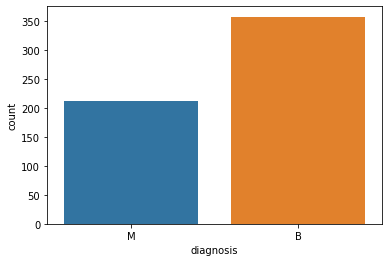

In [6]:
# Красиво узнаем сколько каких
sns.countplot(x=dataset['diagnosis'],label="Count")
plt.show()

In [7]:
#  Проверим датасет на нулевыезначения значения
dataset.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
# И на пустые значения 
dataset.isna().sum()


id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

*нет пустых и нулевых значений, отлично нас это устраевает можно работать дальше*

In [9]:
# Оценим данные о всем датасете (статистически min, max, cтандартное отклонение, среднее и так далее)
dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [10]:
dataset.groupby("radius_se").radius_se.count()

radius_se
0.1115    1
0.1144    1
0.1153    1
0.1166    1
0.1186    1
         ..
1.2960    1
1.3700    1
1.5090    1
2.5470    1
2.8730    1
Name: radius_se, Length: 540, dtype: int64

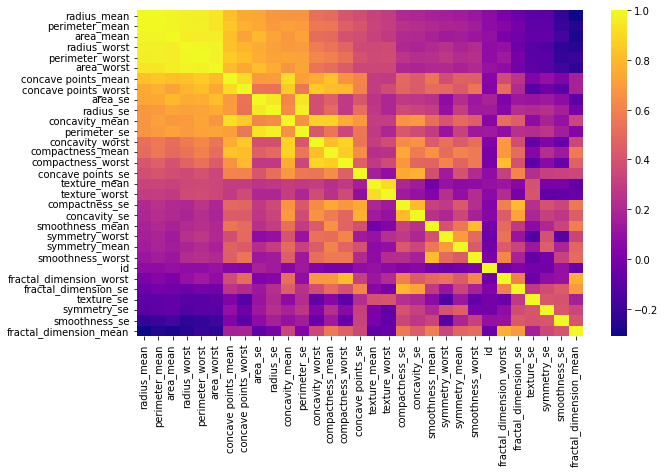

In [11]:
# Корреляционные матрица
# k - ширина равна ширине датасета
k =  dataset.shape[1]

cols = dataset.corr().nlargest(k, 'radius_mean')['radius_mean'].index
cm = dataset[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=False, cmap = 'plasma')
plt.show()

In [12]:
Benign = pd.get_dummies(dataset.diagnosis).iloc[:,1:]
dataset['Malignant'] = Benign
dataset.Malignant.value_counts()

0    357
1    212
Name: Malignant, dtype: int64

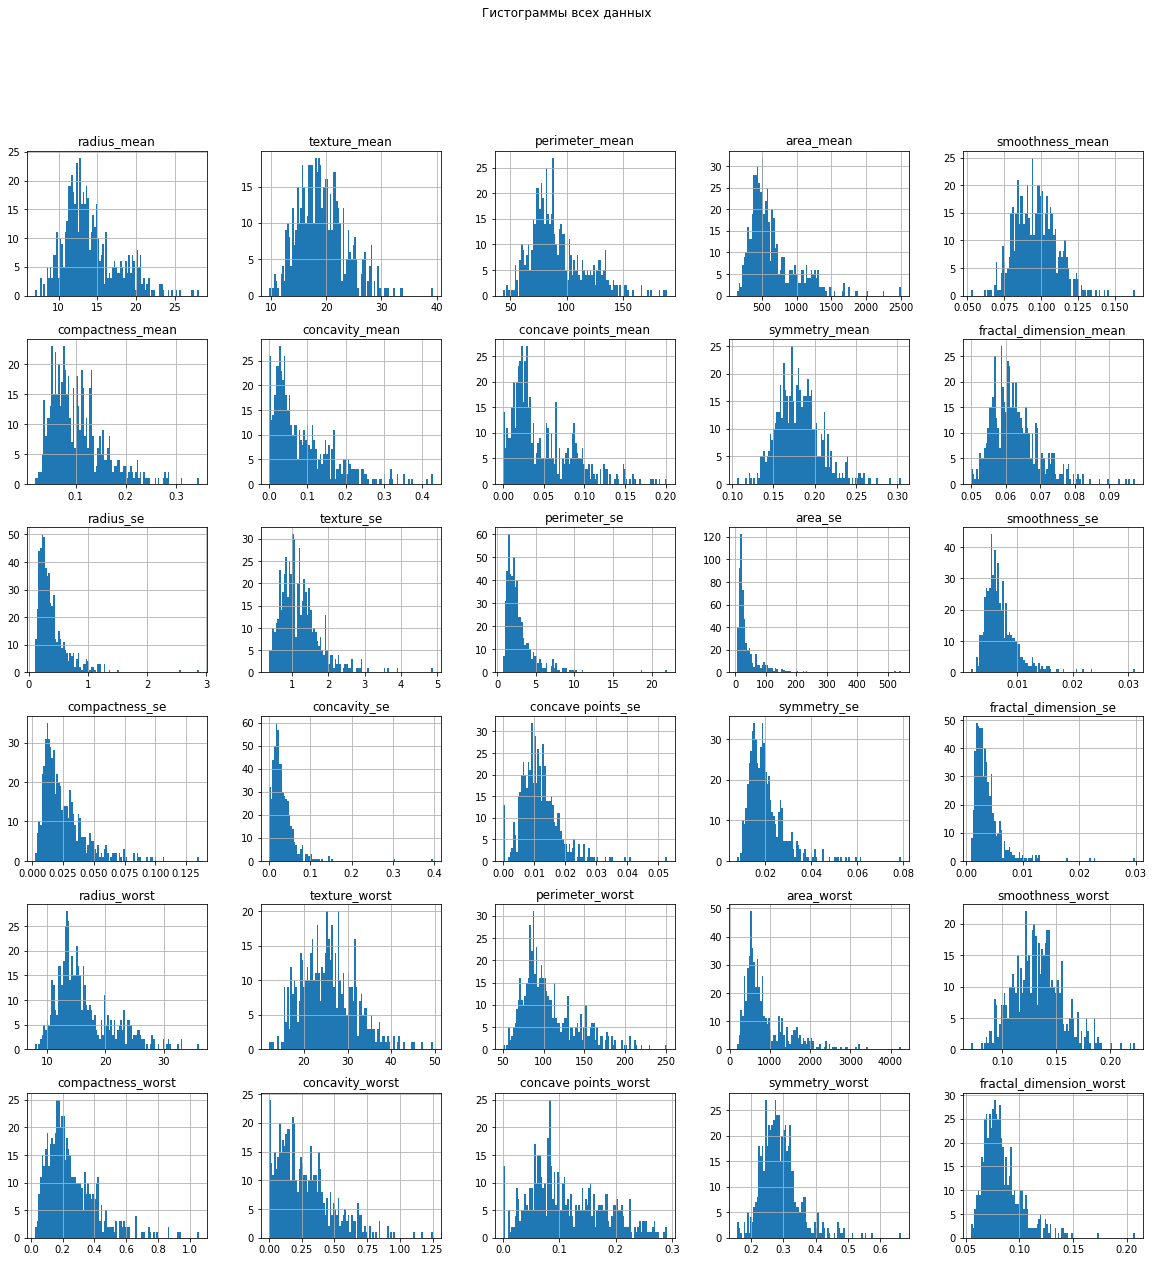

In [21]:
dataset.drop('Malignant' ,axis=1).drop('id' ,axis=1).hist(bins=100, figsize=(20,20))
pl.suptitle('Гистограммы всех данных')
plt.savefig('hists')
plt.show()

In [18]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Malignant
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [29]:
from sklearn.model_selection import train_test_split

#Удаляем столбец с диагнозом

dtata = dataset.drop(['diagnosis'], axis=1)
target = dataset['diagnosis']

#создаем обучающие и тестовые наборы
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(dtata, target, test_size=0.45)

X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)
X_test = pd.DataFrame(X_test)
y_test = pd.DataFrame(y_test)

In [30]:
# Логическая регрессия

from sklearn.linear_model import LogisticRegression

logr = sk.linear_model.LogisticRegression().fit(X_train, y_train.values.ravel())

print('Точность классификатора на обучающем датасете: {:.0f}%'
     .format(logr.score(X_train, y_train) * 100 ))
print('Точность классификатора на тестовом датасете: {:.0f}%'
     .format(logr.score(X_test, y_test) * 100 ))

Точность классификатора на обучающем датасете: 61%
Точность классификатора на тестовом датасете: 65%


In [31]:
# Деревья решений
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier().fit(X_train, y_train.values.ravel())

print('Точность классификатора на обучающем датасете: {:.0f}%'
     .format(dtc.score(X_train, y_train) * 100 ))
print('Точность классификатора на тестовом датасете: {:.0f}%'
     .format(dtc.score(X_test, y_test) * 100))

Точность классификатора на обучающем датасете: 100%
Точность классификатора на тестовом датасете: 100%


In [32]:
# k ближайших соседей
kn = sk.neighbors.KNeighborsClassifier().fit(X_train, y_train.values.ravel())

print('Точность классификатора на обучающем датасете: {:.0f}%'
     .format(kn.score(X_train, y_train) * 100 ))
print('Точность классификатора на тестовом датасете: {:.0f}%'
     .format(kn.score(X_test, y_test) * 100 ))

Точность классификатора на обучающем датасете: 83%
Точность классификатора на тестовом датасете: 71%


In [33]:
# метод опорных векторов
from sklearn.svm import SVC

svm = sk.svm.SVC()
svm.fit(X_train, y_train.values.ravel())
print('Точность классификатора на обучающем датасете: {:.0f}%'
     .format(svm.score(X_train, y_train) * 100))
print('Точность классификатора на тестовом датасете: {:.0f}%'
     .format(svm.score(X_test, y_test) * 100))

Точность классификатора на обучающем датасете: 61%
Точность классификатора на тестовом датасете: 65%


In [34]:
# Линейный дискриминантный анализ
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = sk.discriminant_analysis.LinearDiscriminantAnalysis()
lda.fit(X_train, y_train.values.ravel())
print('Точность классификатора на обучающем датасете:  {:.0f}%'
     .format(lda.score(X_train, y_train) * 100))
print('Точность классификатора на тестовом датасете: {:.0f}%'
     .format(lda.score(X_test, y_test) * 100 ))

Точность классификатора на обучающем датасете:  96%
Точность классификатора на тестовом датасете: 96%


In [35]:
# Наивный Байес
from sklearn.naive_bayes import GaussianNB

gnb = sk.naive_bayes.GaussianNB()
gnb.fit(X_train, y_train.values.ravel())
print('Точность классификатора на обучающем датасете:  {:.0f}%'
     .format(gnb.score(X_train, y_train) * 100 ))
print('Точность классификатора на тестовом датасете: {:.0f}%'
     .format(gnb.score(X_test, y_test) * 100 ))

Точность классификатора на обучающем датасете:  61%
Точность классификатора на тестовом датасете: 65%


In [36]:
tr = dtc.predict(X_test)
print(sk.metrics.confusion_matrix(y_test, tr))
print(sk.metrics.classification_report(y_test, tr))

[[166   0]
 [  0  91]]
              precision    recall  f1-score   support

           B       1.00      1.00      1.00       166
           M       1.00      1.00      1.00        91

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257

